# Seattle Crash Severity Prediction Model 

## A. Introduction

A.1. Business Problem Description and Analysis

The Seattle SPOT Traffic Management Division 

A.2 Data Description

In [2]:
#Necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import sklearn


## Data Pre-Processing

In [167]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()



,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


## Encapsulating necessary data for analysis

In [169]:

tup_crash_data = df_data_1[['SEVERITYCODE','ROADCOND','LIGHTCOND','WEATHER']]
df_crash_data = pd.DataFrame(tup_crash_data, columns = ['SEVERITYCODE','ROADCOND','LIGHTCOND','WEATHER'])
df_crash_data.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [170]:
# Next we must check for null values or empty value fields within rows

nan_crash_data = df_crash_data.isnull()
nan_crash_data

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [171]:
for attribute in nan_crash_data.columns.values.tolist():
    print(attribute)
    print(nan_crash_data[attribute].value_counts().sort_values(ascending=True))
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

ROADCOND
True       5012
False    189661
Name: ROADCOND, dtype: int64

LIGHTCOND
True       5170
False    189503
Name: LIGHTCOND, dtype: int64

WEATHER
True       5081
False    189592
Name: WEATHER, dtype: int64



In [172]:
# Dropping rows with null values to clean up data
df_crash_data = df_crash_data.dropna()
df_crash_data.shape

(189337, 4)

In [173]:
df_crash_data = df_crash_data.reset_index(drop = True)
df_crash_data.isnull().sum()

SEVERITYCODE    0
ROADCOND        0
LIGHTCOND       0
WEATHER         0
dtype: int64

## Next we check the distribution of data labels and explore which features are the most common

In [174]:
df_crash_data['SEVERITYCODE'].value_counts()


1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [158]:
df_crash_data['ROADCOND'].value_counts()


Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64

In [159]:
df_crash_data['LIGHTCOND'].value_counts()


Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [160]:
df_crash_data['WEATHER'].value_counts()

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

## Clear leaders in types of labels are appearing, but it would be better to visualise them 

### Using seaborn and matplotlib we can view a graphical distribution of the leading labels 

(-1000, 80000)

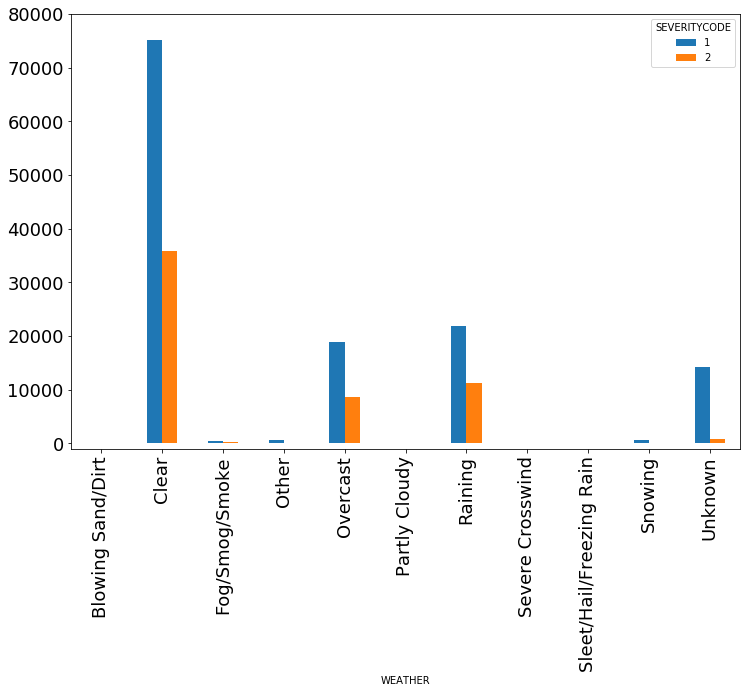

In [115]:
df_crash_data.groupby(['WEATHER', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8), fontsize=18)
plt.ylim((-1000,80000))

(-1000, 90000)

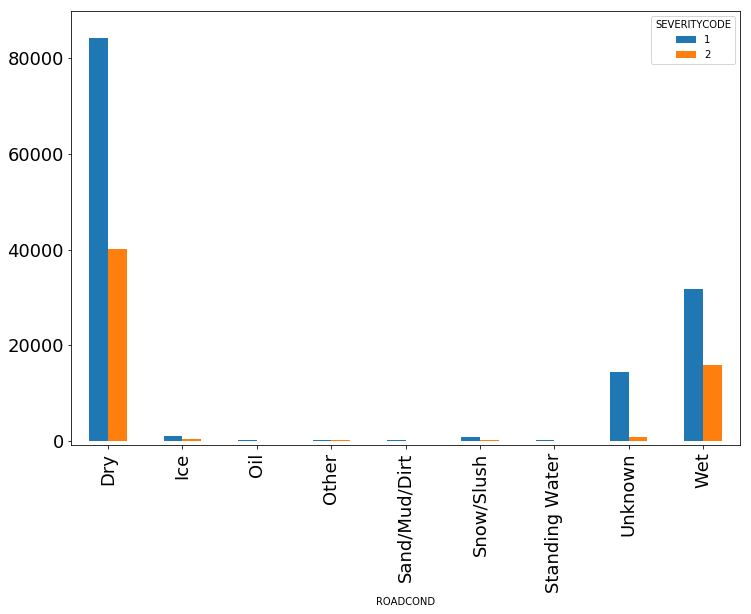

In [116]:
df_crash_data.groupby(['ROADCOND', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8), fontsize=18)
plt.ylim((-1000,90000))

(-1000, 90000)

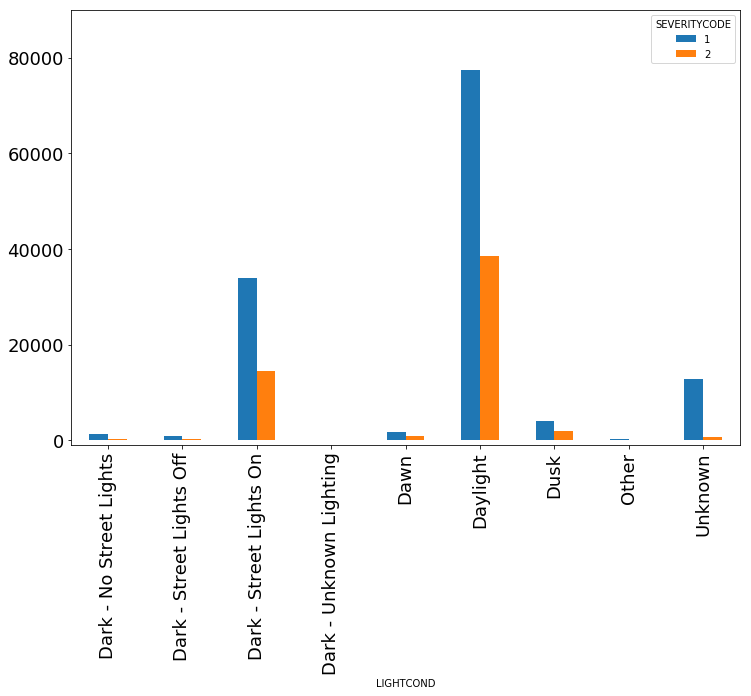

In [117]:
df_crash_data.groupby(['LIGHTCOND', 'SEVERITYCODE']).agg('size').unstack().plot(kind = 'bar', legend=True, figsize=(12, 8), fontsize=18)
plt.ylim((-1000,90000))

# Now that we've seen the trends in different categories, we must convert the categorical variables into numerical ones for further analysis

## This can be achieved through the use of 'One Hot Encoding'

In [175]:
df_crash_data.dtypes
df_crash_data['ROADCOND'].astype(str)
df_crash_data['LIGHTCOND'].astype(str)
df_crash_data['WEATHER'].astype(str)
df_crash_data.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,Wet,Daylight,Overcast
1,1,Wet,Dark - Street Lights On,Raining
2,1,Dry,Daylight,Overcast
3,1,Dry,Daylight,Clear
4,2,Wet,Daylight,Raining


In [176]:
feature = df_crash_data.copy()
feature['ROADCOND'].replace(to_replace= ['Dry','Ice','Unknown', 'Other', 'Oil' , 'Wet', 'Standing Water', 'Snow/Slush', 'Sand/Mud/Dirt'], value= [0,1,2,3,4,5,6,7,8], inplace = True)
feature['WEATHER'].replace(to_replace= ['Clear','Raining','Overcast', 'Unknown', 'Other' , 'Snowing', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain','Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'], value= [0,1,2,3,4,5,6,7,8,9,10], inplace = True)
feature['LIGHTCOND'].replace(to_replace= ['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value= [0,1,2,3,4,5,6,7,8], inplace = True)


In [177]:
feature.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER
0,2,5,0,2
1,1,5,1,1
2,1,0,0,2
3,1,0,0,0
4,2,5,0,1


In [189]:
encoded_data = df_crash_data.copy()
encoded_data = pd.concat([encoded_data, pd.get_dummies(df_crash_data['ROADCOND'])], axis =1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(df_crash_data['LIGHTCOND'])], axis =1)
encoded_data = pd.concat([encoded_data, pd.get_dummies(df_crash_data['WEATHER'])], axis =1)
encoded_data.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,...,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,2,Wet,Daylight,Overcast,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,Wet,Dark - Street Lights On,Raining,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,Dry,Daylight,Overcast,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,Dry,Daylight,Clear,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,Wet,Daylight,Raining,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [184]:
encoded_data.shape

(189337, 33)

In [192]:
encoded_data = encoded_data.drop(['ROADCOND','LIGHTCOND','WEATHER'], axis =1)

In [193]:
X = encoded_data
X[0:5]

,SEVERITYCODE,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,...,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown
0,2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [196]:
Y = df_crash_data['SEVERITYCODE'].values
Y[0:5]

array([2, 1, 1, 1, 2])

## Now to normalise the data and create the training and testing sets

In [199]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.52271934, -1.38246872, -0.08006514, -0.01838847, -0.02631287,
        -0.01977348, -0.07283058, -0.02465262, -0.29365525,  1.7300345 ,
        -0.09040742, -0.0795961 , -0.58634226, -0.00762239, -0.11572163,
         0.79443866, -0.17916958, -0.03525217, -0.27659768, -0.01704616,
        -1.19046285, -0.05490248, -0.06611393,  2.41660142, -0.00513893,
        -0.46042318, -0.01149161, -0.02443718, -0.06914813, -0.29374013],
       [-0.65671984, -1.38246872, -0.08006514, -0.01838847, -0.02631287,
        -0.01977348, -0.07283058, -0.02465262, -0.29365525,  1.7300345 ,
        -0.09040742, -0.0795961 ,  1.70548854, -0.00762239, -0.11572163,
        -1.25875043, -0.17916958, -0.03525217, -0.27659768, -0.01704616,
        -1.19046285, -0.05490248, -0.06611393, -0.41380428, -0.00513893,
         2.17191499, -0.01149161, -0.02443718, -0.06914813, -0.29374013],
       [-0.65671984,  0.72334367, -0.08006514, -0.01838847, -0.02631287,
        -0.01977348, -0.07283058, -0.02465262, -0

In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

# K-Nearest Neighbours Classification

In [202]:
from sklearn.neighbors import KNeighborsClassifier
k = 9

k9neighbors = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = k9neighbors.predict(X_test)
from sklearn import metrics

print("9 Nearest Neighbors Accuracy: ", metrics.accuracy_score(y_test, yhat))

9 Nearest Neighbors Accuracy:  0.9988380690820746


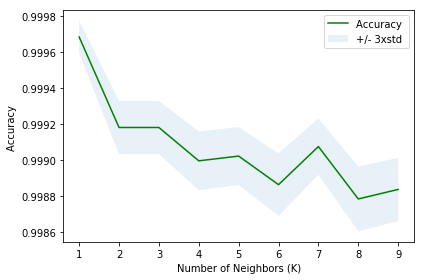

In [203]:
nKs = 10
ConfusionMatrix = [];
mean_acc = np.zeros((nKs-1))
std_acc = np.zeros((nKs-1))
for n in range(1,nKs):
    nkneighbors = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat= nkneighbors.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

plt.plot(range(1,nKs),mean_acc,'g')
plt.fill_between(range(1,nKs),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [205]:
print("Best K Nearest Neighbors accuracy is", mean_acc.max(), "where k is", mean_acc.argmax()+1)


Best K Nearest Neighbors accuracy is 0.9996831097496567 where k is 1


## Support Vector Machine Model

In [204]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
supportvm=SVC(kernel= "rbf").fit(X_train,y_train)
pred_supportvm=supportvm.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Confusion matrix, without normalization
Accuracy score is 0.9994454420618992


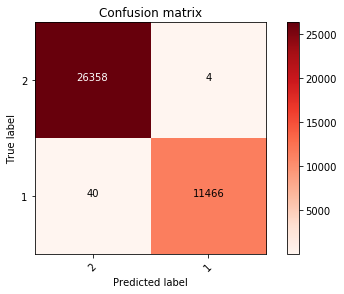

In [206]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
 
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)    
plot_confusion_matrix(cnf_matrix, classes=df_crash_data["SEVERITYCODE"].unique().tolist(),normalize= False,  title='Confusion matrix')
print("Accuracy score is", metrics.accuracy_score(y_test, pred_supportvm))

# Model Evaluation

## We can use several metrics such as F1 Score, Jaccard Index and Standard Accuracy to measure the Precision and 'Accuracy' of the two Machine Learning models employed

In [208]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)

In [236]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

KnnJaccard = jaccard_similarity_score(y_test, yhat)
KnnF1 = f1_score(y_test, yhat, average='weighted')
print("K-Nearest Neighbors Average F1-score: %.7f" % KnnF1 )
print("K-Nearest Neighbors Jaccard Score: %.7f" % KnnJaccard )

K-Nearest Neighbors Average F1-score: 0.9988376
K-Nearest Neighbors Jaccard Score: 0.9988381


In [237]:
yhatSVM=pred_supportvm
SVMJaccard = jaccard_similarity_score(y_test.reshape(-1,1), yhatSVM)
SVMF1 = f1_score(y_test.reshape(-1,1), yhatSVM, average='weighted')
print("SVM Average F1-score: %.7f" % SVMF1)
print("SVM Jaccard score: %.7f" % SVMJaccard)

SVM Average F1-score: 0.9994453
SVM Jaccard score: 0.9994454


## Final Evaluation of the Algorithms

| Algorithm          | Jaccard  | F1-score | Accuracy|
|--------------------|----------|----------|---------|
| KNN                | 0.9988381| 0.9988376| 0.9996  |
| SVM                | 0.9994454| 0.9994453| 0.9994  |

## Conclusion

Overall, we see that both machine learning models were extremely accurate for the given data set and predicted crash severity values with a very low margin of error. 